In [3]:
pip install transformers sentence-transformers torch

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
import torch
import time
import joblib

c:\Users\koira\OneDrive - Ujju\Desktop\E-commerce_semantic\myenv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# df = pd.read_csv('/content/drive/MyDrive/Semantic/product_data.csv')
df = pd.read_csv('product_data.csv')
df.head(10)

,link,product_title,price,actual_price,ratings,color
0,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i3 12th Gen | 16GB RAM | 512G...,"Rs. 55,999",NaN,13 Ratings,Black
1,https://www.daraz.com.np/products/apple-macboo...,Apple MacBook Air 13-inch M1 256GB - Oliz Store,"Rs. 109,900","Rs. 139,900",76 Ratings,Space Grey
2,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i5 12th Gen | 16GB RAM | 512G...,"Rs. 68,999",NaN,22 Ratings,Black
3,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i5 12th Gen | 8GB RAM | 256GB...,"Rs. 64,000",NaN,8 Ratings,Black
4,https://www.daraz.com.np/products/acer-nitro-v...,Acer Nitro V 15 i7 13th Gen 13620H | 16GB DDR5...,"Rs. 137,999",NaN,2 Ratings,Black
5,https://www.daraz.com.np/products/lenovo-v15-c...,"Lenovo V15 celeron 4GB RAM 256GB SSD,15.6 inch...","Rs. 33,998","Rs. 45,000",22 Ratings,Black
6,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i3 12th Gen | 8GB RAM | 512GB...,"Rs. 52,500",NaN,3 Ratings,Black
7,https://www.daraz.com.np/products/dell-celeron...,Dell Celeron 5470 Intel UHD 8/256GB SSD,"Rs. 35,800","Rs. 40,000",5 Ratings,Black
8,https://www.daraz.com.np/products/acer-aspire-...,Acer Aspire 3 Ryzen 7 - 5700U / 16 GB RAM/ 512...,"Rs. 73,990","Rs. 89,990",No Ratings,Silver
9,https://www.daraz.com.np/products/acer-nitro-v...,Acer Nitro V 15 Core i5-13420H 13th Gen/ 16 GB...,"Rs. 101,990","Rs. 119,990",1 Ratings,Black


In [7]:
df.shape

(599, 6)

In [8]:
df.isnull().sum()

link               0
product_title      0
price              1
actual_price     365
ratings            0
color              0
dtype: int64

In [9]:
# As actual_price contains so many missing data and it is not important for our analysis so i will drop this column
df.drop(columns='actual_price', axis=1, inplace=True)

In [10]:
df.columns

Index(['link', 'product_title', 'price', 'ratings', 'color'], dtype='object')

In [11]:
df['ratings'] = df['ratings'].str.replace(' Ratings', '')

In [12]:
# As there is "NO" in some rows of this dataset i will replace it with 0 rating
df['ratings'] = df['ratings'].str.replace('No', '0').astype(int)

In [13]:
df.head(10)

,link,product_title,price,ratings,color
0,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i3 12th Gen | 16GB RAM | 512G...,"Rs. 55,999",13,Black
1,https://www.daraz.com.np/products/apple-macboo...,Apple MacBook Air 13-inch M1 256GB - Oliz Store,"Rs. 109,900",76,Space Grey
2,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i5 12th Gen | 16GB RAM | 512G...,"Rs. 68,999",22,Black
3,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i5 12th Gen | 8GB RAM | 256GB...,"Rs. 64,000",8,Black
4,https://www.daraz.com.np/products/acer-nitro-v...,Acer Nitro V 15 i7 13th Gen 13620H | 16GB DDR5...,"Rs. 137,999",2,Black
5,https://www.daraz.com.np/products/lenovo-v15-c...,"Lenovo V15 celeron 4GB RAM 256GB SSD,15.6 inch...","Rs. 33,998",22,Black
6,https://www.daraz.com.np/products/dell-vostro-...,Dell Vostro 3520 i3 12th Gen | 8GB RAM | 512GB...,"Rs. 52,500",3,Black
7,https://www.daraz.com.np/products/dell-celeron...,Dell Celeron 5470 Intel UHD 8/256GB SSD,"Rs. 35,800",5,Black
8,https://www.daraz.com.np/products/acer-aspire-...,Acer Aspire 3 Ryzen 7 - 5700U / 16 GB RAM/ 512...,"Rs. 73,990",0,Silver
9,https://www.daraz.com.np/products/acer-nitro-v...,Acer Nitro V 15 Core i5-13420H 13th Gen/ 16 GB...,"Rs. 101,990",1,Black


In [14]:
df.rename(columns={'price': 'price (NRP)'}, inplace=True)

In [15]:
df.columns

Index(['link', 'product_title', 'price (NRP)', 'ratings', 'color'], dtype='object')

In [16]:
df['price (NRP)'] = df['price (NRP)'].str.replace('Rs.', '')
df.dropna(inplace=True) # as it has only 1 NAN so i'm removing it
df['price (NRP)'] = df['price (NRP)'].str.replace(',', '').astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 598
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   link           598 non-null    object
 1   product_title  598 non-null    object
 2   price (NRP)    598 non-null    int64 
 3   ratings        598 non-null    int64 
 4   color          598 non-null    object
dtypes: int64(2), object(3)
memory usage: 28.0+ KB


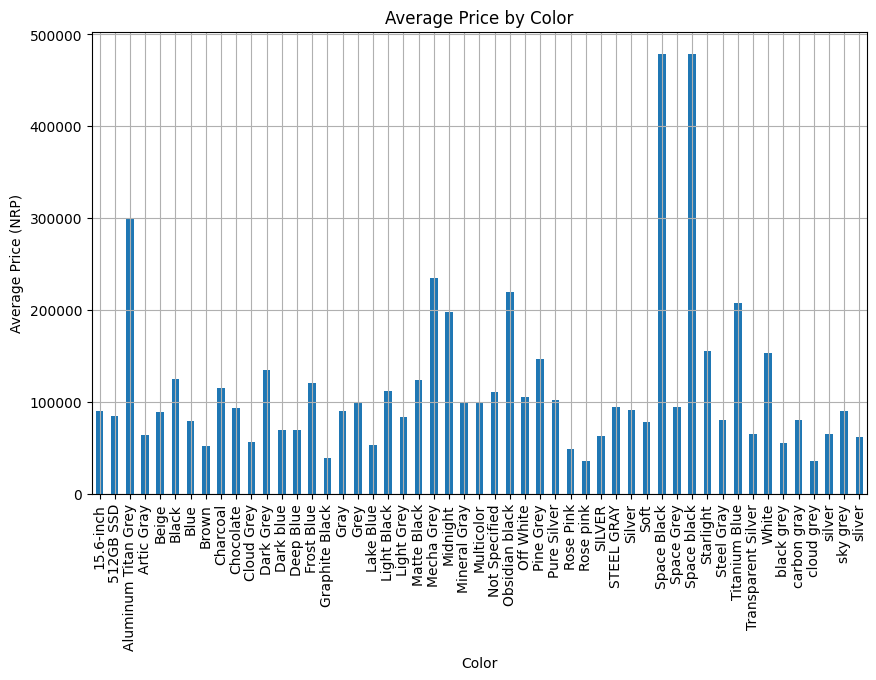

In [18]:
# Bar Plot of Average Price by Color
plt.figure(figsize=(10, 6))
df.groupby('color')['price (NRP)'].mean().plot(kind='bar')
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price (NRP)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

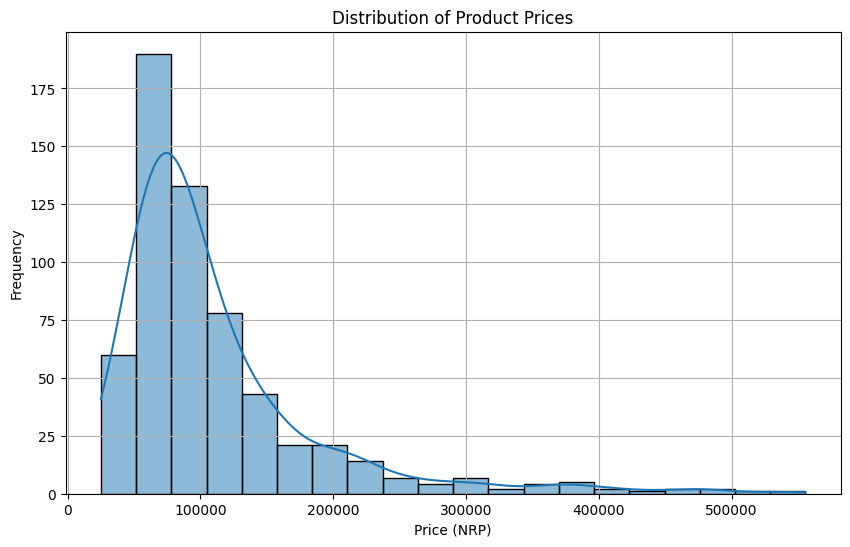

In [19]:
# Histogram of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price (NRP)'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (NRP)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

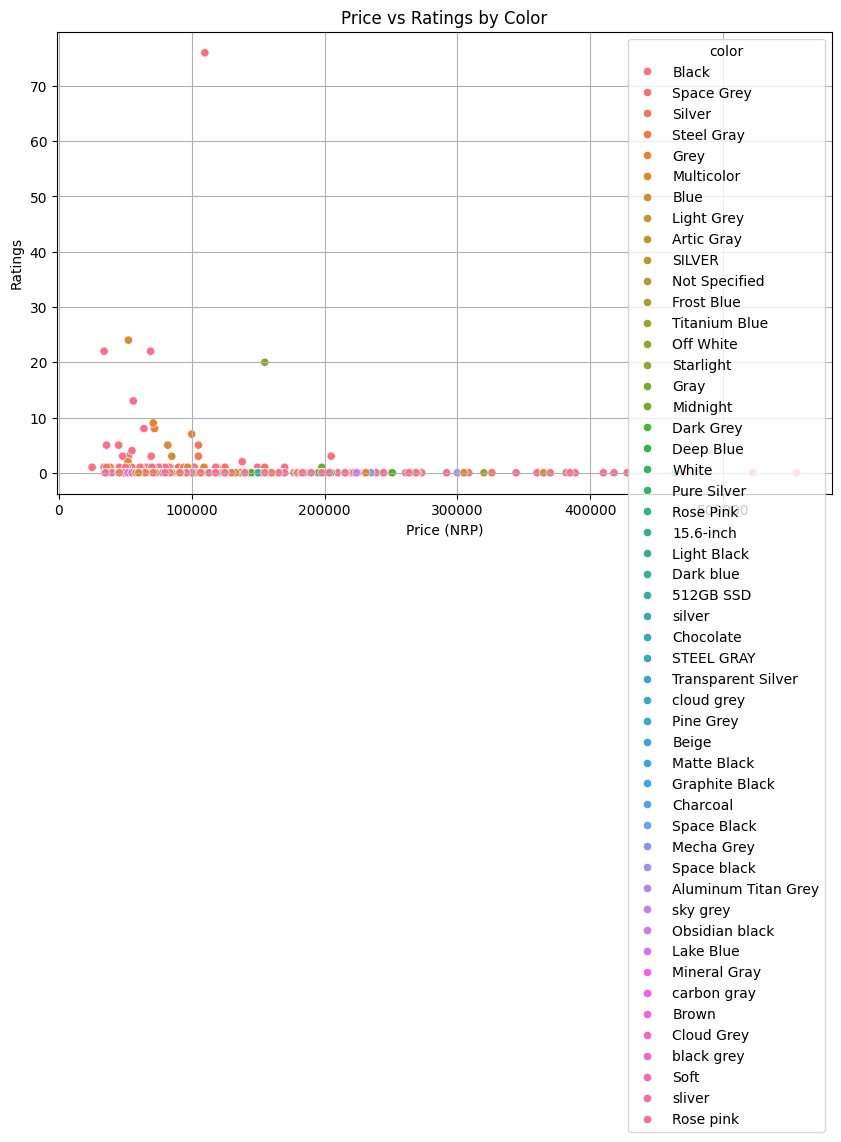

In [20]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price (NRP)', y='ratings', hue='color')
plt.title('Price vs Ratings by Color')
plt.xlabel('Price (NRP)')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

In [21]:
titles = df['product_title'].to_list()
prices = df['price (NRP)'].to_list()
ratings = df['ratings'].to_list()
colors = df['color'].to_list()
links = df['link'].to_list()

In [23]:
model = SentenceTransformer('LaBSE')

In [24]:
embed = model.encode(titles, show_progress_bar=True, convert_to_tensor=True)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches: 100%|██████████| 19/19 [00:25<00:00,  1.33s/it]


In [25]:
def search_product(query, threshold=0.3):
    start_time = time.time()  # Start time tracking
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Perform semantic search
    hits = util.semantic_search(query_embedding, embed)
    hits = hits[0]  # Get the list of results

    # Sort hits by similarity score in descending order
    hits = sorted(hits, key=lambda x: x['score'], reverse=True)

    # Filter results based on threshold to avoid irrelevant results
    top_hits = [hit for hit in hits if hit['score'] >= threshold]
    end_time = time.time()  # End time tracking

    # Time calculation
    elapsed_time = end_time - start_time
    print("Results (after {:.3f} seconds):".format(elapsed_time))

    # Check if any valid results exist
    if top_hits:
        print(f"Top 5 matches for: '{query}'\n")
        for hit in top_hits[:5]:  # Display top 5 relevant matches
            index = hit['corpus_id']
            print(f"Product title: {titles[index]}")
            print(f"Price: {prices[index]}")
            print(f"Rating: {ratings[index]}")
            print(f"Color: {colors[index]}")
            print(f"Link: {links[index]}")  # Output the product link
            print(f"Score: {hit['score']:.3f}")
            print("-" * 40)  # Separator for readability
    else:
        print("No matching product found.")

In [26]:
search_product("i5 laptop")

Results (after 0.143 seconds):
Top 5 matches for: 'i5 laptop'

Product title: Lenovo ideapad Slim 3 i5 13th Gen 8GB RAM 512ssd 15.6 Screen Laptop
Price: 70990
Rating: 9
Color: Grey
Link: https://www.daraz.com.np/products/lenovo-ideapad-slim-3-i5-13th-gen-8gb-ram-512ssd-156-screen-laptop-i128136700.html
Score: 0.570
----------------------------------------
Product title: Lenovo ideapad Slim 3 i5 13th Gen 8GB RAM 512ssd 15.6 Screen Laptop
Price: 70990
Rating: 9
Color: Grey
Link: https://www.daraz.com.np/products/lenovo-ideapad-slim-3-i5-13th-gen-8gb-ram-512ssd-156-screen-laptop-i128136700.html
Score: 0.570
----------------------------------------
Product title: Dell Laptop 3520 I3 12th Generation 8gb 512gb
Price: 53500
Rating: 0
Color: Black
Link: https://www.daraz.com.np/products/dell-laptop-3520-i3-12th-generation-8gb-512gb-i129588505.html
Score: 0.554
----------------------------------------
Product title: HP Laptop 15s 3q2116AU
Price: 106700
Rating: 0
Color: Silver
Link: https://www.

In [27]:
search_product("Acer i3 laptop")

Results (after 0.126 seconds):
Top 5 matches for: 'Acer i3 laptop'

Product title: Acer Aspire 3 AL14-31P Ultraslimbook i3-N305-8GB RAM-512GB SS-14FHD-Sliver Color
Price: 54897
Rating: 1
Color: Silver
Link: https://www.daraz.com.np/products/acer-aspire-3-al14-31p-ultraslimbook-i3-n305-8gb-ram-512gb-ss-14fhd-sliver-color-i129691037.html
Score: 0.638
----------------------------------------
Product title: Acer Aspire 5 Intel Core i5 13th Gen 8GB Ram 512GB SSD 15.6"FHD
Price: 85000
Rating: 0
Color: Multicolor
Link: https://www.daraz.com.np/products/acer-aspire-5-intel-core-i5-13th-gen-8gb-ram-512gb-ssd-156fhd-i146981245.html
Score: 0.629
----------------------------------------
Product title: Acer Aspire 5 Intel Core i5 13th Gen 8GB Ram 512GB SSD 15.6"FHD
Price: 76997
Rating: 1
Color: Multicolor
Link: https://www.daraz.com.np/products/acer-aspire-5-intel-core-i5-13th-gen-8gb-ram-512gb-ssd-156fhd-i128041232.html
Score: 0.629
----------------------------------------
Product title: Acer Aspi

In [28]:
search_product("Nokia")

Results (after 0.116 seconds):
No matching product found.


In [29]:
search_product("Hello Maharaj")

Results (after 0.123 seconds):
No matching product found.


In [30]:
search_product("Nitro 5")

Results (after 0.117 seconds):
Top 5 matches for: 'Nitro 5'

Product title: Acer Nitro 5 I5- 10Th Gen 8 Gb Ram / 256 Gb Ssd /Rtx 3050
Price: 110250
Rating: 0
Color: Black
Link: https://www.daraz.com.np/products/acer-nitro-5-i5-10th-gen-8-gb-ram-256-gb-ssd-rtx-3050-i125806070.html
Score: 0.474
----------------------------------------
Product title: Acer Nitro 5 Amd Ryzen 7 5800H 16GB Ram 256GB SSD 4GB GTX 1650 Graphics 15.6"FHD 144Hz
Price: 112000
Rating: 0
Color: Black
Link: https://www.daraz.com.np/products/acer-nitro-5-amd-ryzen-7-5800h-16gb-ram-256gb-ssd-4gb-gtx-1650-graphics-156fhd-144hz-i128476703.html
Score: 0.406
----------------------------------------
Product title: Acer nitro 5 I9 12900HX | 16GB | 1TB SSD | RTX 4060
Price: 166499
Rating: 0
Color: Black
Link: https://www.daraz.com.np/products/acer-nitro-5-i9-12900hx-16gb-1tb-ssd-rtx-4060-i137928569.html
Score: 0.388
----------------------------------------
Product title: Acer Nitro 5 2020 i7 10TH GEN / GTX 1650ti / 15.6" FHD 1

In [31]:
# Saveing data and embeddings into a joblib file
joblib.dump({
    'titles': titles,
    'prices': prices,
    'ratings': ratings,
    'colors': colors,
    'links': links,
    'embeddings': embed
}, 'product_data_embeddings.joblib')

print("Joblib file saved successfully!")

Joblib file saved successfully!
